# Particle Swarm Optimization

In chapter 3 we're introduced to the concept of the global  best, and how particle use this to move towards a best position.

In [79]:
import numpy as np
import matplotlib.pyplot as plt

Exercise 1 and 2

In [80]:
def objective_function(particle):
    """quadratic function"""
    x, y = particle.position
    return x**2 + y**2

In [81]:
class Swarm:
    def __init__(self, num_particles, search_space, c1=2, c2=2):
        self.search_space = search_space
        self.particles = [Particle(search_space, c1, c2) for _ in range(num_particles)]
        self.global_best_position = np.array([0, 0])
        self.global_best_fitness = float('inf')
        
    def update_once(self):
        for particle in self.particles:
            # calculate fitness
            fitness = objective_function(particle)

            # update particle
            particle.update_velocity(self.global_best_position)
            particle.update_position(fitness)
            
            # update global best
            if self.global_best_fitness == 0 or fitness < self.global_best_fitness:
                self.global_best_position = particle.position
                self.global_best_fitness = fitness
    
    def update(self, num_iterations):
        for _ in range(num_iterations):
            self.update_once()
            
    def get_positions(self):
        x = [particle.position[0] for particle in self.particles]
        y = [particle.position[1] for particle in self.particles]
        return x, y
            

class Particle:
    def __init__(self, search_space, c1, c2):
        self.search_space = search_space
        self.position = np.random.uniform(search_space[0], search_space[1], size=2)
        self.velocity =  np.random.uniform(-1, 1, size=2)
        self.inertia = 0.9
        self.inertia_decay = 0.99
        self.c1 = c1
        self.c2 = c2
        self.pbest_position = self.position
        self.pbest_fitness = objective_function(self)
        
    def update_velocity(self, global_best_position):
        # calculate velocity
        cognitive_component = self.c1 * np.random.uniform(0, 1) * (self.pbest_position - self.position)
        social_component = self.c2 * np.random.uniform(0, 1) * (global_best_position - self.position)
        new_velocity = self.inertia * self.velocity + cognitive_component + social_component
        new_velocity = np.clip(new_velocity, -10, 10)
        self.velocity = new_velocity
        
        # update inertia
        self.inertia *= self.inertia_decay
        
    def update_position(self, fitness):
        # calculate position update
        self.position += self.velocity
        self.position = np.clip(self.position, self.search_space[0], self.search_space[1])
        
        # update pbest
        if fitness < self.pbest_fitness:
            self.pbest_position = self.position
            self.pbest_fitness = fitness
            
    def update(self):
        self.update_velocity()
        self.update_position()
        
        

In [82]:
swarm = Swarm(2500, [-1000, 1000], c1=2, c2=2)

Exercise 3

In [83]:
def plot(swarm):
    x, y = swarm.get_positions()
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x, y, color='blue', s=5)
    
    # Add gridlines at the (0,0) coordinate
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.title("Particle swarm")
    plt.show()

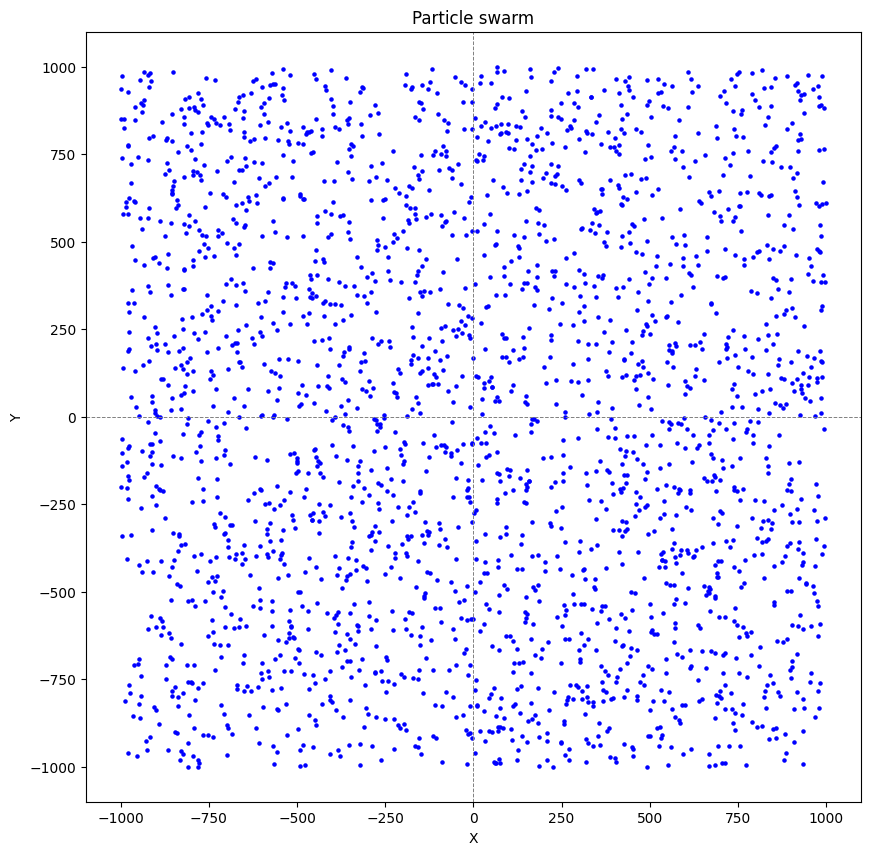

In [84]:
plot(swarm)

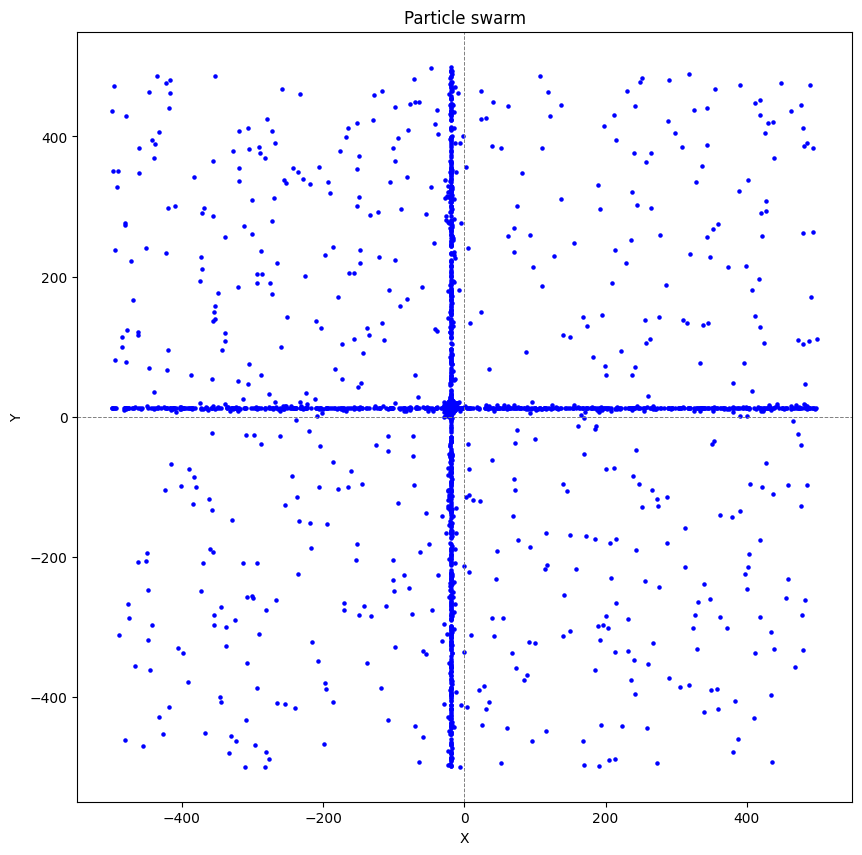

In [85]:
swarm.update(50)
plot(swarm)

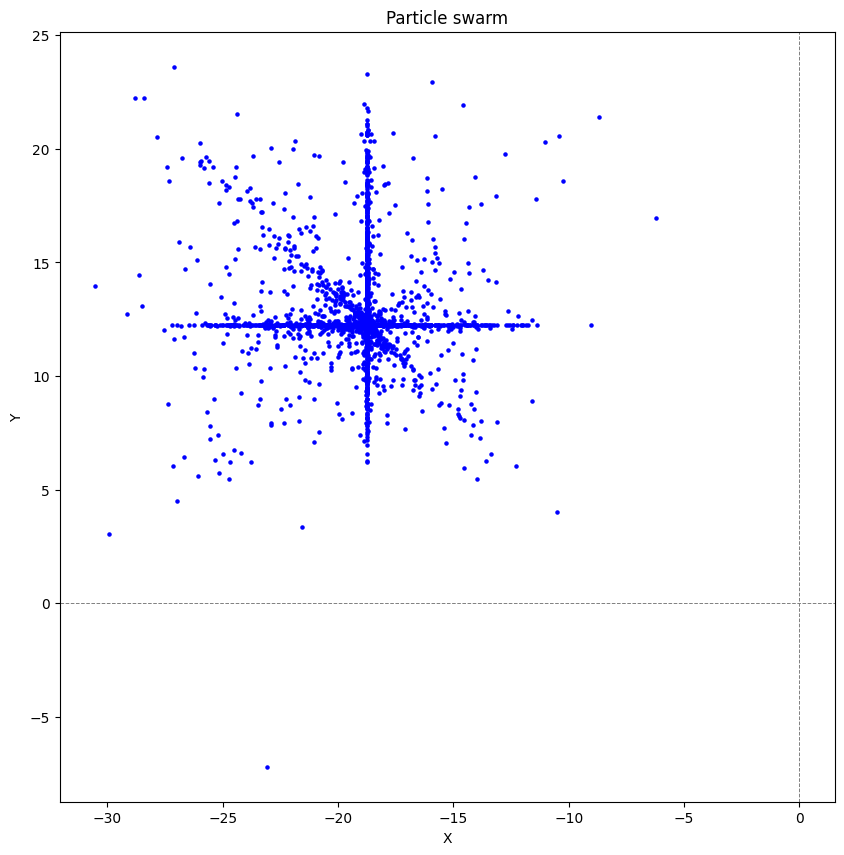

In [86]:
swarm.update(450)
plot(swarm)

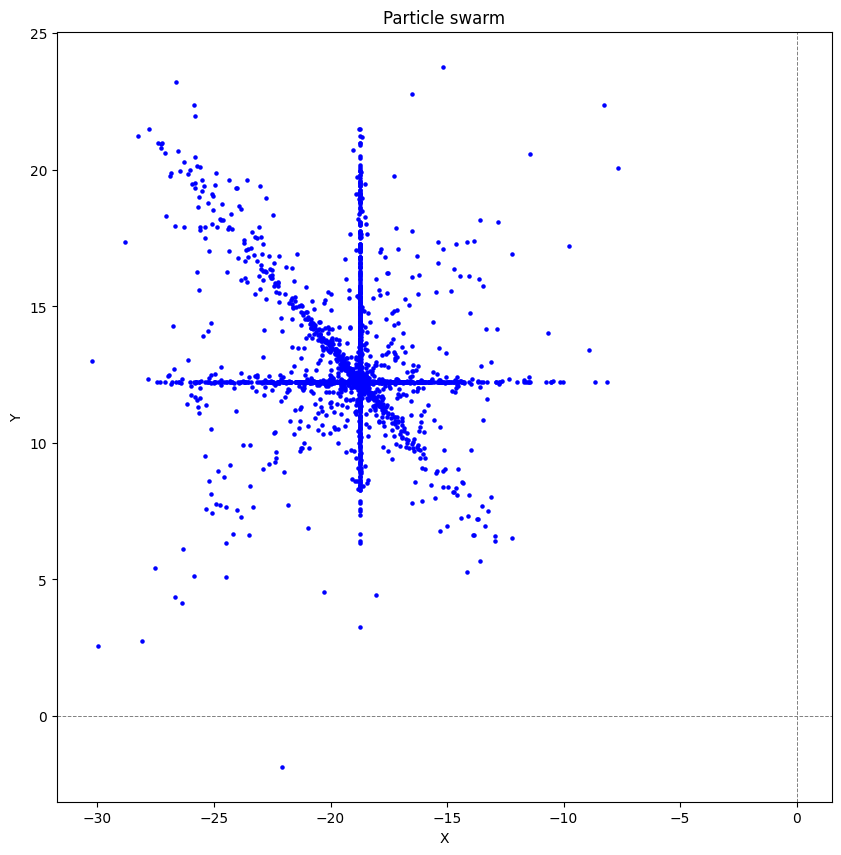

In [87]:
swarm.update(500)
plot(swarm)

In the above visualizations we can see how the particle distribution evolves over time, using the personal and global best working together. 

In the first example, the particles are randomly distributed. 
In the second plot, we can see that the particles have distributed to a cross pattern, which is interesting.

In the the third plot (500 loops), we can see that the particles are finally moving towards a ball in the center, although there's still a small cross present.

In the final plot (1000 loops total), we can see the objective function complete, as a nice ball shape is present.

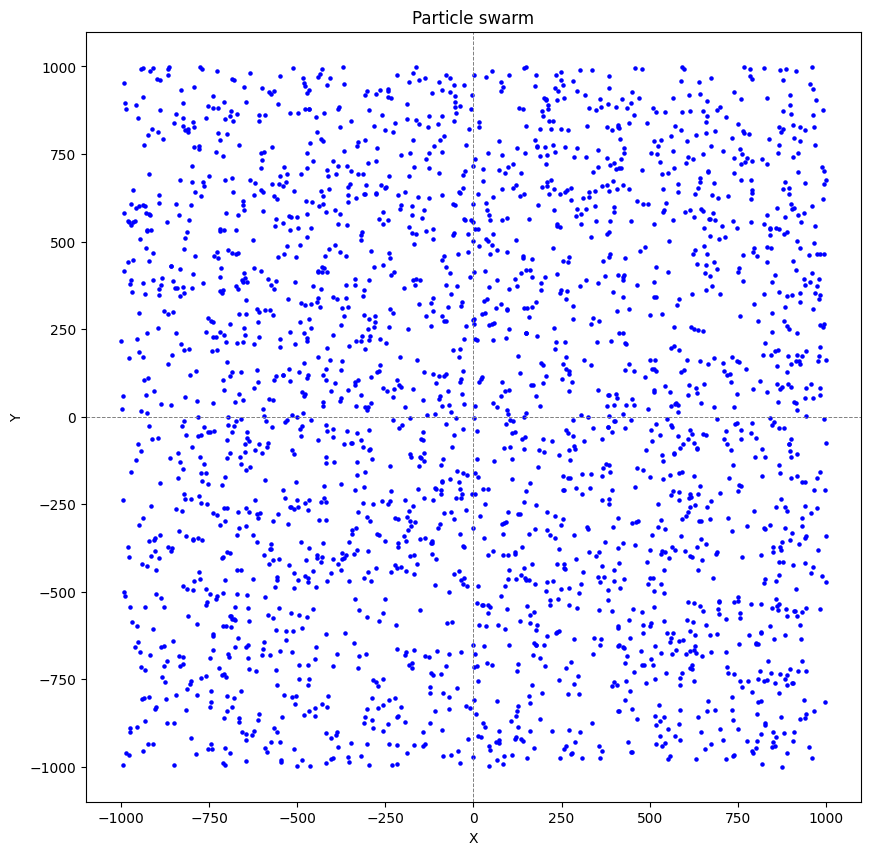

In [88]:
new_swarm = Swarm(2500, [-1000, 1000], c1=2, c2=4)
plot(new_swarm)

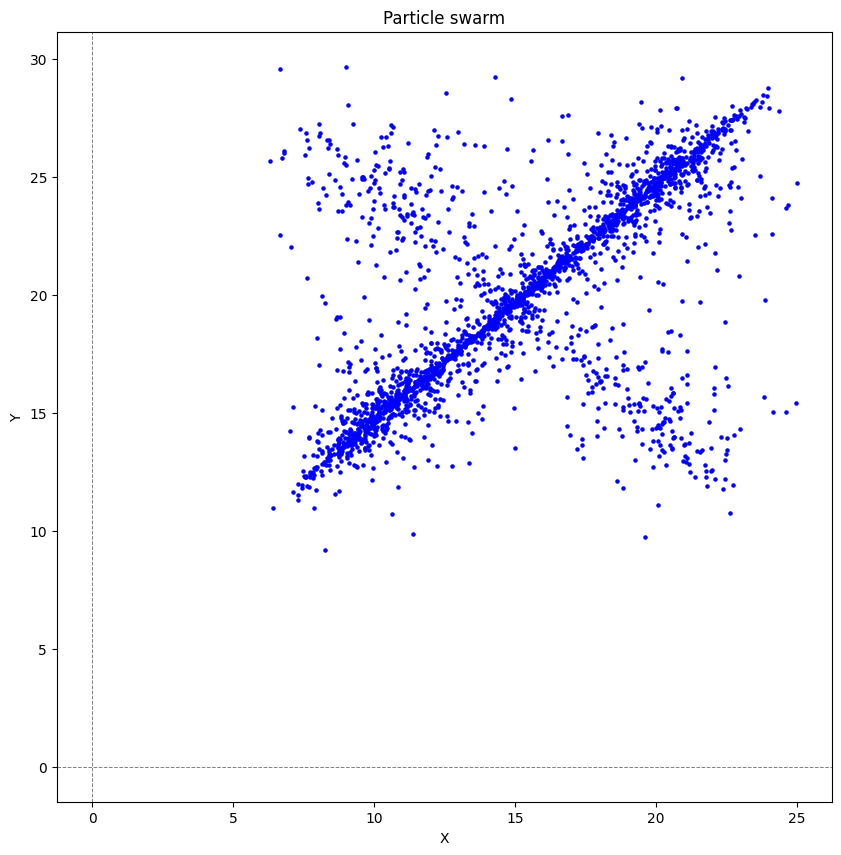

In [89]:
new_swarm.update(1000)
plot(new_swarm)

We can see that with a higher social weight, the particles still converge towards an acceptable shape, although the offset is much higher than with the balanced weights.

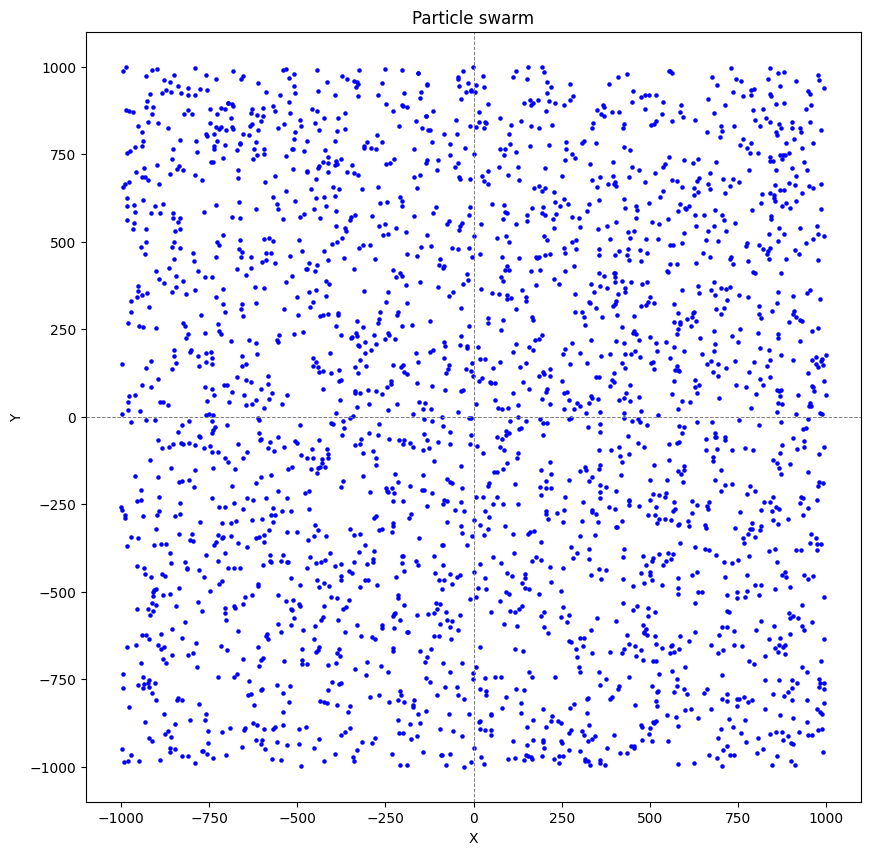

In [90]:
new_swarm_2 = Swarm(2500, [-1000, 1000], c1=4, c2=2)
plot(new_swarm_2)

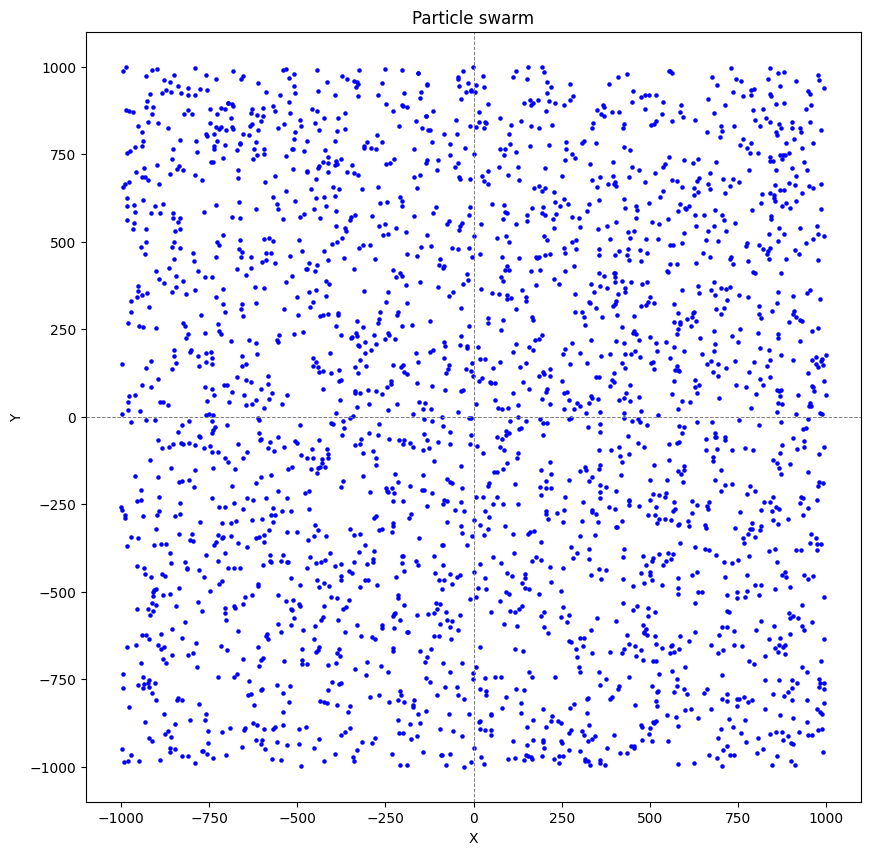

In [91]:
new_swarm.update(1000)
plot(new_swarm_2)

We can see that with a higher personal weight, the particles don't converge at all towards the best shape. This is probably because the particles are too focused on finding their personal best.